# Сколько вы сможете заработать, если не будете курить на протяжении 10 лет?

In [428]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set2')

## Вводные данные:
Курильщик в возрасте 30 лет хочет бросить курить. Я решил смоделировать что будет, если он всё-таки бросит курить, и начнёт инвестировать сэкономленные деньги.
В качестве аналогии я взял розничную цену на пачку сигарет в 150 руб, а временной промежуток для инвестирования - 2012-2022.
Табачная инфляция 10% годовых.

# Реальный пример с пиф ВТБ на Индекс Мосбиржи (ОПИФ рыночных финансовых инструментов «ВТБ - Индекс МосБиржи»	)

## Руками забираем котировки с сайта УК, и чистим данные

In [429]:
quotes = 'quotes.xlsx'
data = pd.read_excel(quotes)
data
#Читаем данные из файла

,ОПИФ рыночных финансовых инструментов «ВТБ - Индекс МосБиржи»,Unnamed: 1,Unnamed: 2
0,c 01.01.2012 по 01.01.2022,NaN,NaN
1,Дата,"Стоимость пая, руб.","Стоимость чистых активов, руб."
2,30.12.2021,9793.51,5359968453.22
3,29.12.2021,9691.53,5304154644.83
4,28.12.2021,9711.63,5294001467.7
...,...,...,...
2468,16.01.2012,2584.54,312728856.32
2469,13.01.2012,2601.12,316186632.58
2470,12.01.2012,2611.18,317492379.99
2471,11.01.2012,2605.63,317064042.32


In [430]:
data.drop(['Unnamed: 2'], axis = 1, inplace=True)
data.drop([0, 1], inplace=True)
data.reset_index(drop=True, inplace=True)

In [431]:
data.iloc[0]

ОПИФ рыночных финансовых инструментов «ВТБ - Индекс МосБиржи»    30.12.2021
Unnamed: 1                                                          9793.51
Name: 0, dtype: object

In [432]:
data = data.iloc[::-1]
data.reset_index(drop=True, inplace=True)
data.rename(columns = {'ОПИФ рыночных финансовых инструментов «ВТБ - Индекс МосБиржи»': 'Date', 'Unnamed: 1': 'Price'}, inplace=True)

In [433]:
data['Cig_price'] = 0

In [434]:
data.Price = data.Price.astype(int)

### Данные вроде бы почистили, надо привести всё к нужным типам

In [435]:
data.dtypes

Date         object
Price         int32
Cig_price     int64
dtype: object

In [436]:
date = []
for i in data.Date:
    date.append(i.replace('.', '/'))

In [437]:
data['Date'] = date
data

,Date,Price,Cig_price
0,10/01/2012,2607,0
1,11/01/2012,2605,0
2,12/01/2012,2611,0
3,13/01/2012,2601,0
4,16/01/2012,2584,0
...,...,...,...
2466,24/12/2021,9557,0
2467,27/12/2021,9677,0
2468,28/12/2021,9711,0
2469,29/12/2021,9691,0


In [438]:
import datetime
dates = []
for i in data['Date']:
    date_str = i.split('/')
    date_date = datetime.datetime(int(date_str[2]), int(date_str[1]), int(date_str[0]))
    dates.append(date_date)

In [439]:
data['Date'] = dates
data

,Date,Price,Cig_price
0,2012-01-10,2607,0
1,2012-01-11,2605,0
2,2012-01-12,2611,0
3,2012-01-13,2601,0
4,2012-01-16,2584,0
...,...,...,...
2466,2021-12-24,9557,0
2467,2021-12-27,9677,0
2468,2021-12-28,9711,0
2469,2021-12-29,9691,0


# Тут уже начинаем моделирование

In [440]:
Cig_price = [150]
for i in range(len(data['Date'])):
    if i > 1:
        if data['Date'][i-1].month != data['Date'][i].month:
            Cig_price.append(round(Cig_price[-1] * 1.008, 2))
        else:
            Cig_price.append(Cig_price[-1])


Cig_price.append(Cig_price[-1])
data['Cig_price'] = Cig_price
#тут мы считаем стоимость пачки сигарет с индексацией на 10% годовых каждый месяц

In [441]:
import calendar
Cig_price = []
for i in range(len(data['Date'])):
    if i != 0:
        if calendar.weekday(data['Date'][i].year, data['Date'][i].month, data['Date'][i].day) == 0:
            data['Cig_price'][i] *= 3
            # если день недели = понедельнику, то количество "выкуренных" пачек сигарет умножается на 3, так как мы перенаправляем финансы ещё и с выходных дней

C:\Users\Danil(ROOT)\AppData\Local\Temp\ipykernel_11248\1324659080.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cig_price'][i] *= 3


### Для инвестирования всего капитала мы проводим сплит фонда в 400 раз, аналогичен по стоимости фонд TMOS

In [442]:
spl_price = []
for i in data['Price']:
    spl_price.append(round(i/400, 2))

data['Splited_price'] = spl_price
data['Quantity_shares'] = data['Cig_price'] // data['Splited_price']
#считаем сколько акций мы можем купить каждый день отказа от курения

In [443]:
data

,Date,Price,Cig_price,Splited_price,Quantity_shares
0,2012-01-10,2607,150.0,6.52,23.0
1,2012-01-11,2605,150.0,6.51,23.0
2,2012-01-12,2611,150.0,6.53,22.0
3,2012-01-13,2601,150.0,6.50,23.0
4,2012-01-16,2584,450.0,6.46,69.0
...,...,...,...,...,...
2466,2021-12-24,9557,387.2,23.89,16.0
2467,2021-12-27,9677,1161.6,24.19,48.0
2468,2021-12-28,9711,387.2,24.28,15.0
2469,2021-12-29,9691,387.2,24.23,15.0


In [444]:
count_shares = []
for i in range(len(data['Quantity_shares'])):
    if i == 0:
        count_shares.append(data['Quantity_shares'][i])
    else:
        count_shares.append(count_shares[-1] + data['Quantity_shares'][i])

data['Total_earned_shares'] = count_shares
#Количество акций, накопленных к этому дню

In [445]:
data['Wealth'] = data['Total_earned_shares'] * data['Splited_price']
#накопленная сумма каждый день моделирования

In [446]:
data.Wealth.iloc[-1]

1912989.6

In [447]:
#data.to_excel('бпиф.xlsx')

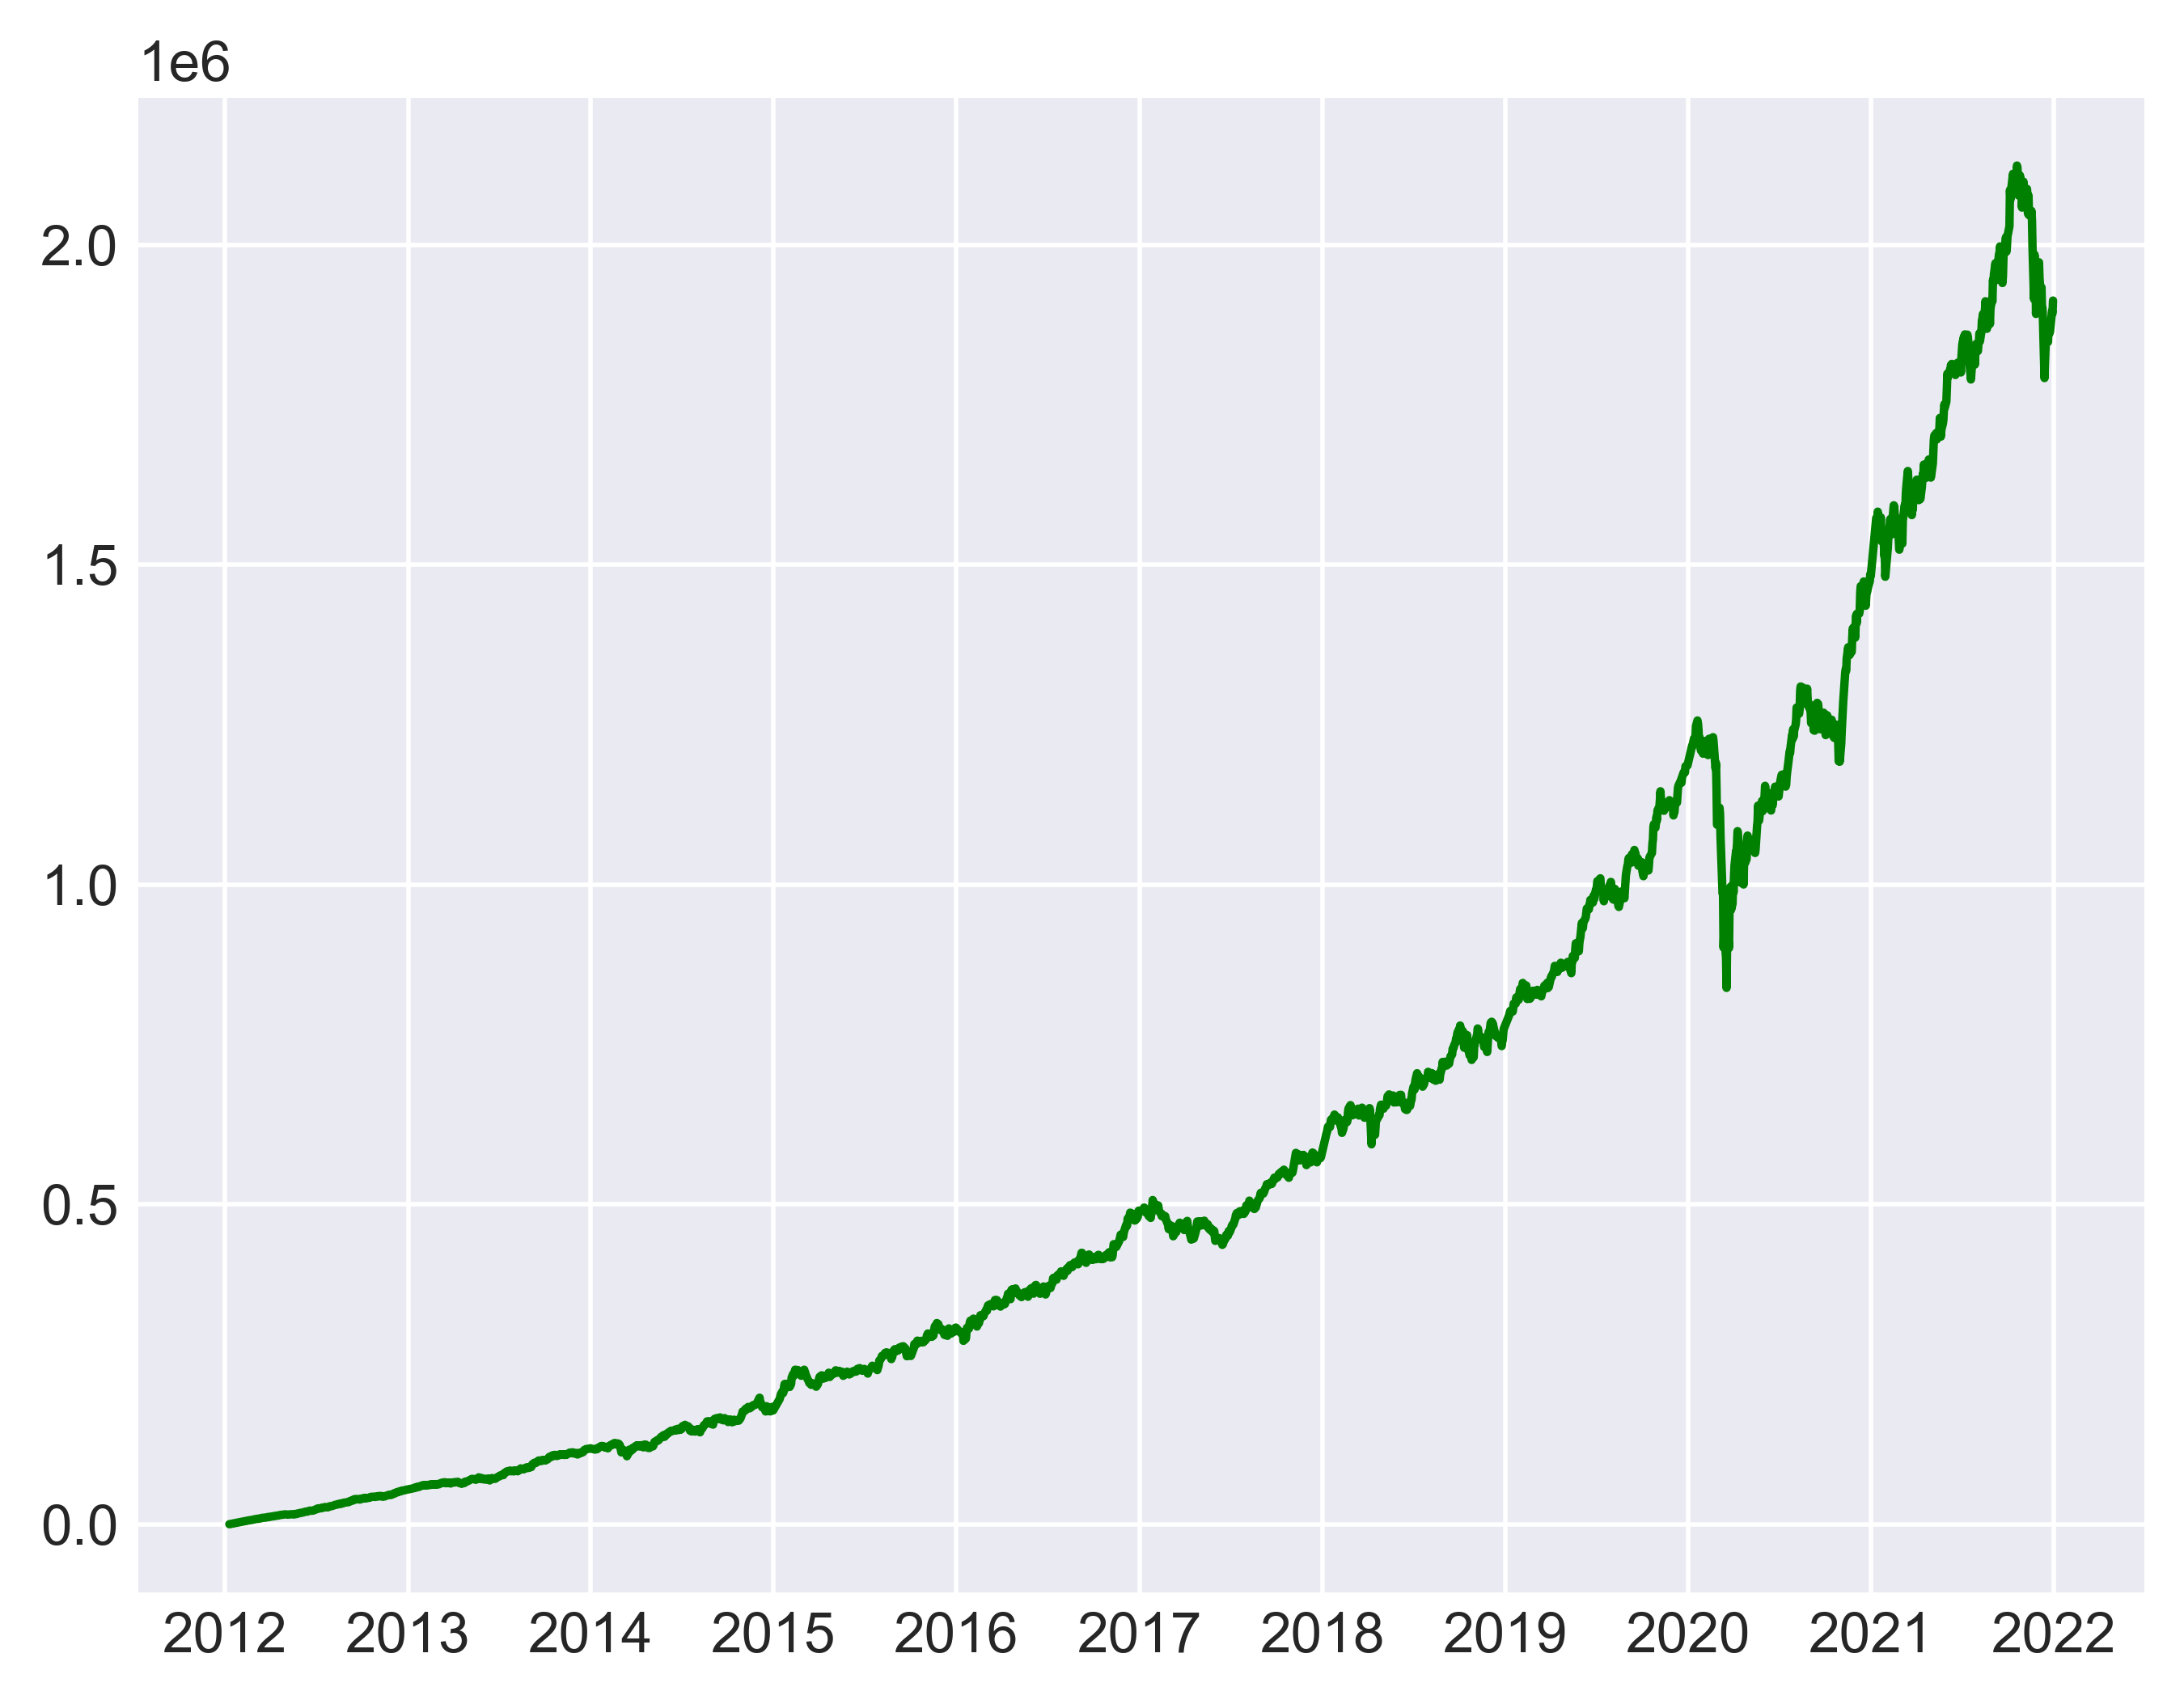

In [448]:
fig, ax1 = plt.subplots()

x = data['Date']
y1 = data['Wealth']


ax2 = ax1.plot()

plt.rcParams["figure.dpi"] = 500


ax1.plot(x, y1, 'g-');


## В таком сценарии, бывший курильщик получает капитал примерно в 1.9 млн руб к концу 2021 года

# А если 30-летняя перспектива?
Считаем среднюю доходность, и готовимся к дальнейшим вычислениям

In [449]:
data

,Date,Price,Cig_price,Splited_price,Quantity_shares,Total_earned_shares,Wealth
0,2012-01-10,2607,150.0,6.52,23.0,23.0,149.96
1,2012-01-11,2605,150.0,6.51,23.0,46.0,299.46
2,2012-01-12,2611,150.0,6.53,22.0,68.0,444.04
3,2012-01-13,2601,150.0,6.50,23.0,91.0,591.50
4,2012-01-16,2584,450.0,6.46,69.0,160.0,1033.60
...,...,...,...,...,...,...,...
2466,2021-12-24,9557,387.2,23.89,16.0,78052.0,1864662.28
2467,2021-12-27,9677,1161.6,24.19,48.0,78100.0,1889239.00
2468,2021-12-28,9711,387.2,24.28,15.0,78115.0,1896632.20
2469,2021-12-29,9691,387.2,24.23,15.0,78130.0,1893089.90


In [450]:
data_by_year = pd.DataFrame(columns= ['Date', 'Quote'])

In [451]:
years = []
for i in range(2012, 2022):
    years.append(data[data['Date'] >= f'{i}-01-11'].iloc[0]['Date'])

In [452]:
data_by_year['Date'] = years

In [453]:
data_by_year

,Date,Quote
0,2012-01-11,NaN
1,2013-01-11,NaN
2,2014-01-13,NaN
3,2015-01-12,NaN
4,2016-01-11,NaN
5,2017-01-11,NaN
6,2018-01-11,NaN
7,2019-01-11,NaN
8,2020-01-13,NaN
9,2021-01-11,NaN


In [454]:
spl_prc = []
for i in data_by_year['Date']:
    spl_prc.append(data['Splited_price'][data.Date[data.Date == i].index[0]])

print(spl_prc)

[6.51, 6.81, 6.8, 7.15, 8.31, 11.21, 11.86, 13.47, 18.48, 21.55]


In [455]:
data_by_year['Quote'] = spl_prc

In [456]:
data_by_year.loc[len(data_by_year)] = [data.iloc[-1].Date, data.iloc[-1].Splited_price]


In [457]:
growth = []
for i in range(len(data_by_year.Quote)):
    if i != 0:
        growth.append(round(((data_by_year.Quote[i] / data_by_year.Quote[i - 1]) - 1) * 100, 2))
        

print(growth)

sum(growth) / len(growth)

[4.61, -0.15, 5.15, 16.22, 34.9, 5.8, 13.58, 37.19, 16.61, 13.6]


14.751

### Итак, средний прирост за 10 лет среднегодовой прирост составил 14.75%

# А что будет, если человек после 10 лет того, как он бросил курить не хочет дальше копить, но хочет продолжить инвестировать?

In [458]:
no_hoard = pd.DataFrame(columns= ['Date', 'Quote'])

In [459]:
no_hoard.Date = [i for i in range(2022, 2043)]

In [460]:
no_hoard.Quote = [24.48 * (1.1475 ** i) for i in range(1, 22)]

In [461]:
no_hoard['Wealth'] = [71537 * no_hoard.Quote[i] for i in range(0, 21)]

In [462]:
no_hoard

,Date,Quote,Wealth
0,2022,28.090800,2.009532e+06
1,2023,32.234193,2.305937e+06
2,2024,36.988736,2.646063e+06
3,2025,42.444575,3.036358e+06
4,2026,48.705150,3.484220e+06
5,2027,55.889160,3.998143e+06
6,2028,64.132811,4.587869e+06
7,2029,73.592400,5.264580e+06
8,2030,84.447279,6.041105e+06
9,2031,96.903253,6.932168e+06


In [463]:
no_hoard.Wealth.iloc[-1]

31488263.812780764

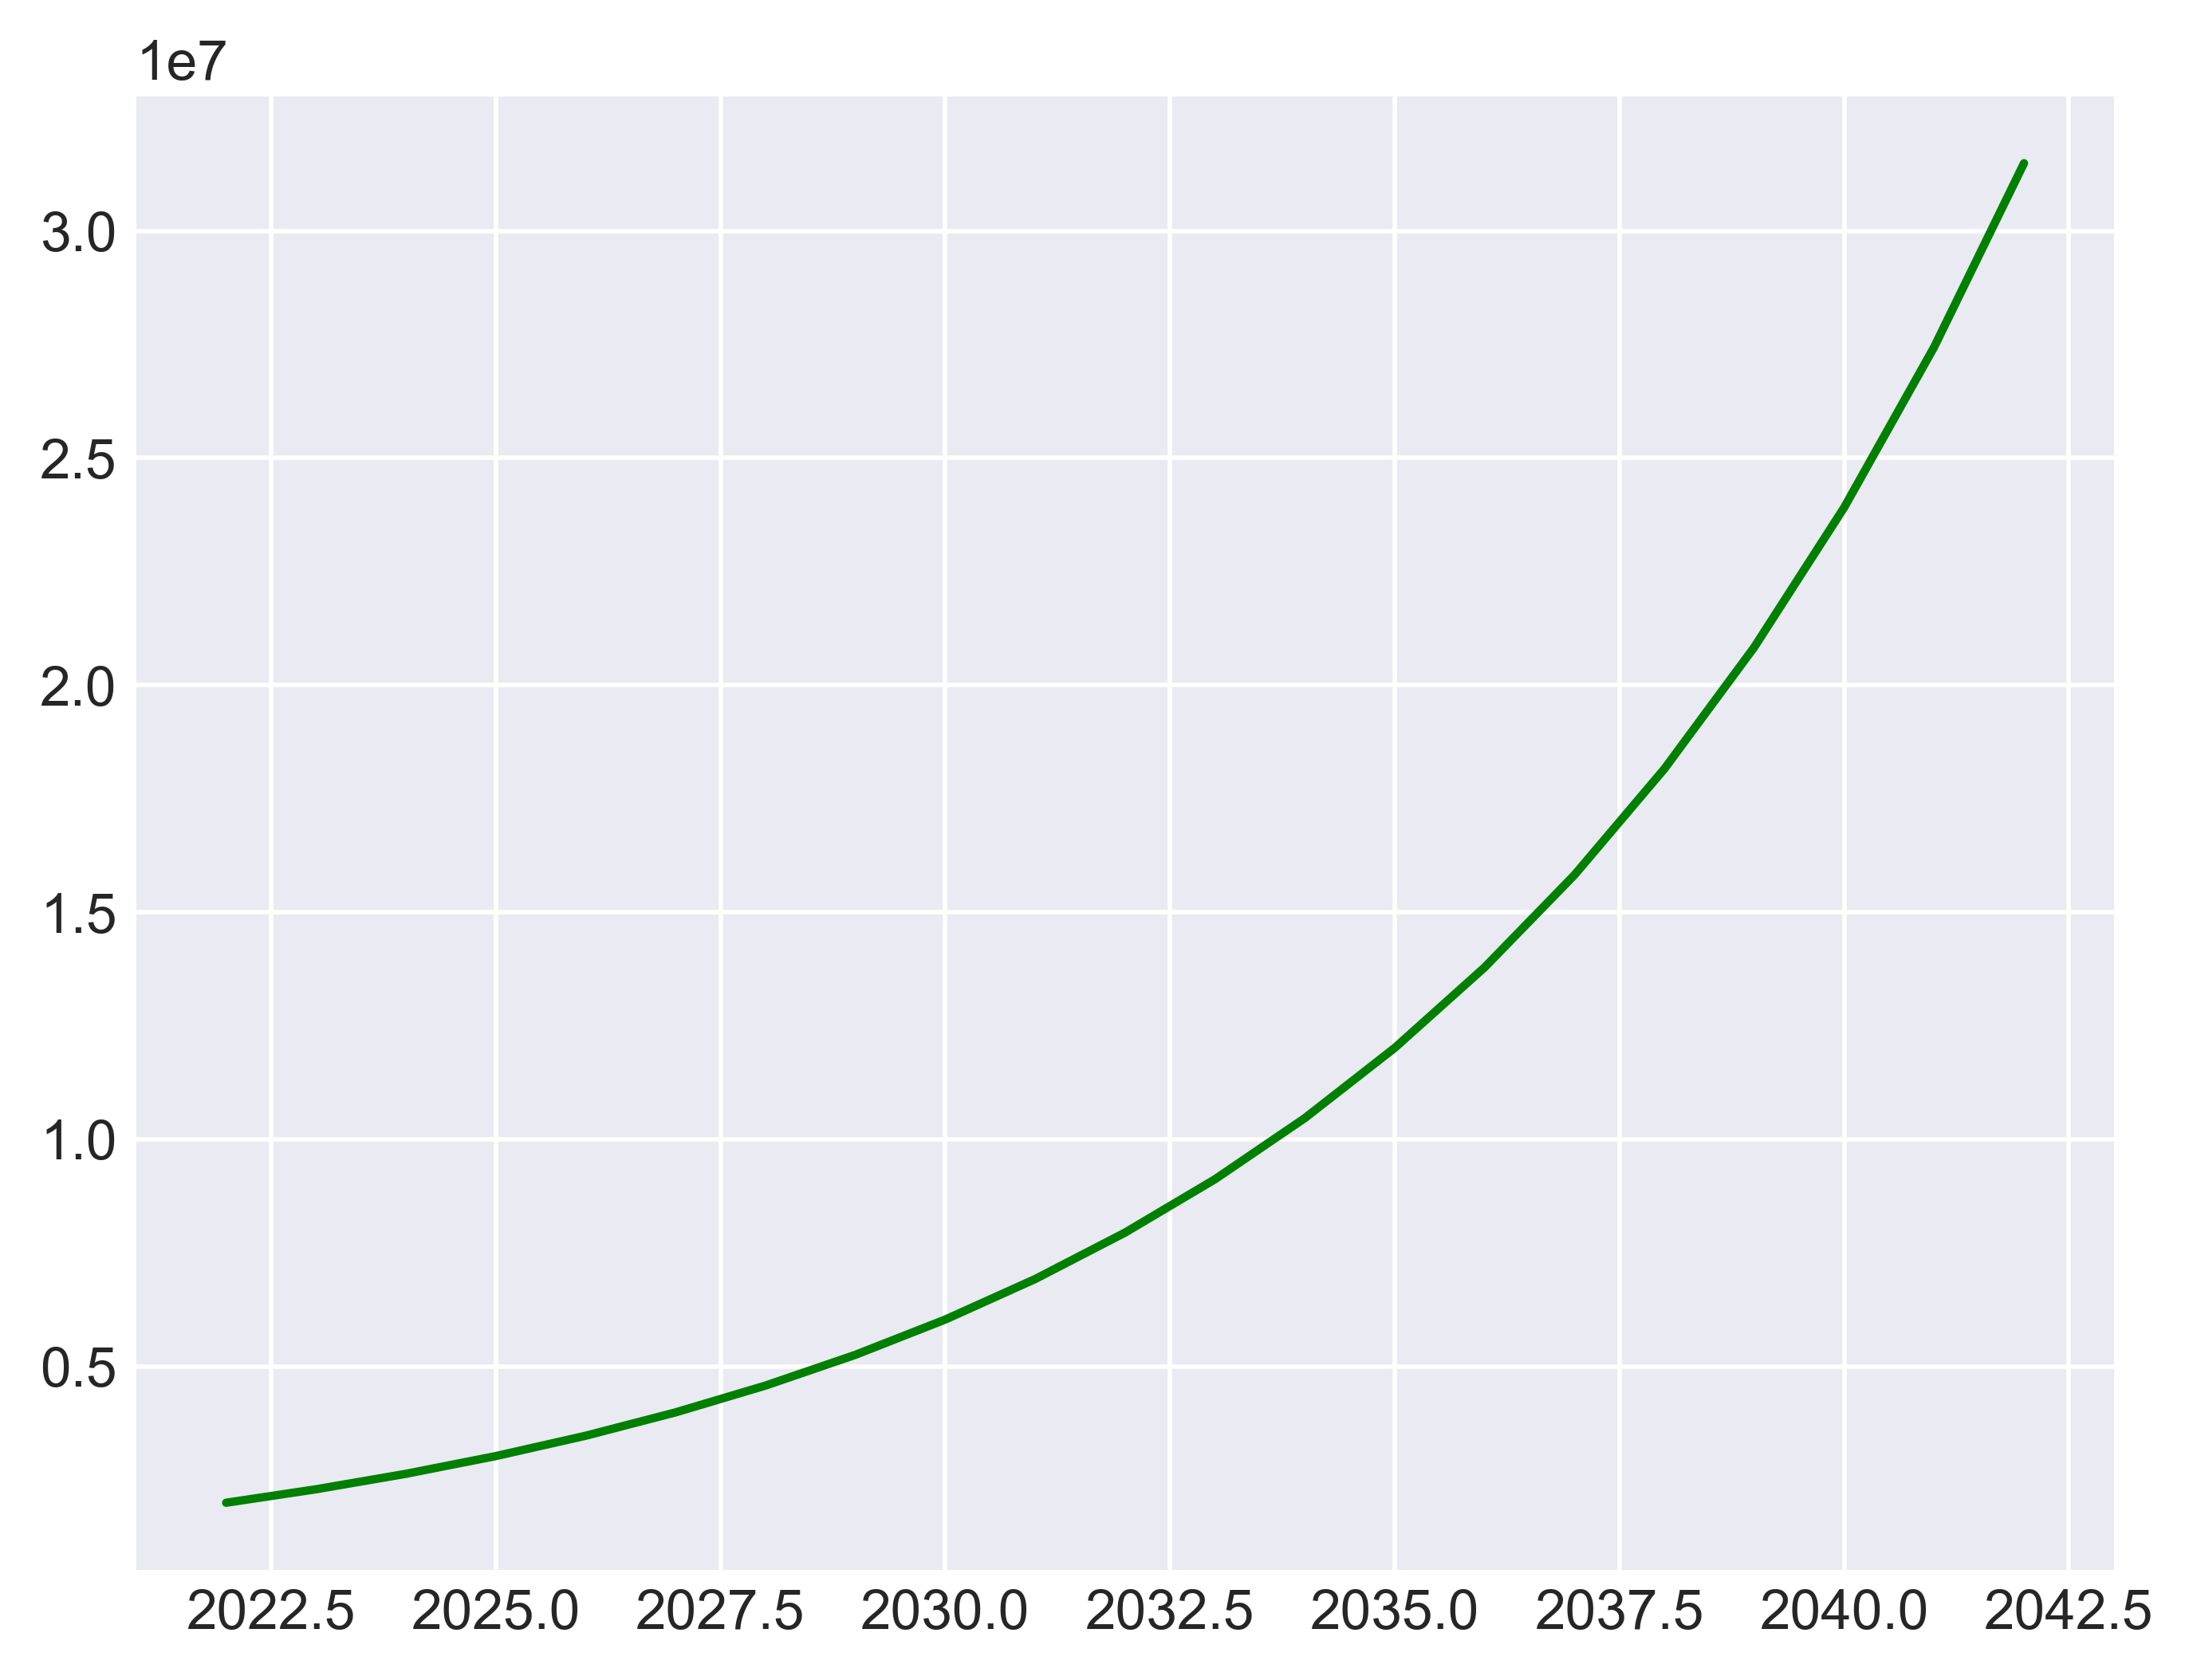

In [464]:
fig, ax1 = plt.subplots()

x = no_hoard['Date']
y1 = no_hoard['Wealth']


ax2 = ax1.plot()

ax1.plot(x, y1, 'g-')

## Бывший курильщик в таком сценарии получает капитал в почти 31.5 млн руб в номинальном выражении в конце 2042 года

# А если курильщик хочет продолжать откладывать на инвестиции стоимость 1 пачки сигарет ежедневно?

In [465]:
hoard = pd.DataFrame(columns= ['Date', 'Quote', 'Cig_price', 'Count_shares', 'Wealth'])

In [466]:
hoard.Date = [datetime.datetime(i, 12, 30) for i in range(2022, 2043)]
hoard.Quote = no_hoard.Quote
hoard.Cig_price = [(319.69 * 365) * (1.085 ** i) for i in range(1, 22)]

In [467]:
hoard

,Date,Quote,Cig_price,Count_shares,Wealth
0,2022-12-30,28.090800,126605.232250,NaN,NaN
1,2023-12-30,32.234193,137366.676991,NaN,NaN
2,2024-12-30,36.988736,149042.844536,NaN,NaN
3,2025-12-30,42.444575,161711.486321,NaN,NaN
4,2026-12-30,48.705150,175456.962658,NaN,NaN
5,2027-12-30,55.889160,190370.804484,NaN,NaN
6,2028-12-30,64.132811,206552.322865,NaN,NaN
7,2029-12-30,73.592400,224109.270309,NaN,NaN
8,2030-12-30,84.447279,243158.558285,NaN,NaN
9,2031-12-30,96.903253,263827.035740,NaN,NaN


In [468]:
# hoard.Count_shares = 
for i in range(len(hoard.Date)):
    if i == 0:
        hoard.Count_shares[i] = 71537 + hoard.Cig_price[i] // hoard.Quote[i]
    else:
       hoard.Count_shares[i] = hoard.Count_shares[i-1] + hoard.Cig_price[i] // hoard.Quote[i]


C:\Users\Danil(ROOT)\AppData\Local\Temp\ipykernel_11248\1801732696.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hoard.Count_shares[i] = 71537 + hoard.Cig_price[i] // hoard.Quote[i]
C:\Users\Danil(ROOT)\AppData\Local\Temp\ipykernel_11248\1801732696.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hoard.Count_shares[i] = hoard.Count_shares[i-1] + hoard.Cig_price[i] // hoard.Quote[i]


In [469]:
hoard.Wealth = hoard.Quote * hoard.Count_shares
hoard

,Date,Quote,Cig_price,Count_shares,Wealth
0,2022-12-30,28.090800,126605.232250,76043.0,2136108.7044
1,2023-12-30,32.234193,137366.676991,80304.0,2588534.634672
2,2024-12-30,36.988736,149042.844536,84333.0,3119371.112514
3,2025-12-30,42.444575,161711.486321,88142.0,3741149.738152
4,2026-12-30,48.705150,175456.962658,91744.0,4468405.274553
5,2027-12-30,55.889160,190370.804484,95150.0,5317853.529932
6,2028-12-30,64.132811,206552.322865,98370.0,6308744.575627
7,2029-12-30,73.592400,224109.270309,101415.0,7463373.25892
8,2030-12-30,84.447279,243158.558285,104294.0,8807344.531273
9,2031-12-30,96.903253,263827.035740,107016.0,10370198.503812


In [470]:
hoard.Wealth.iloc[-1]

56671568.08218857

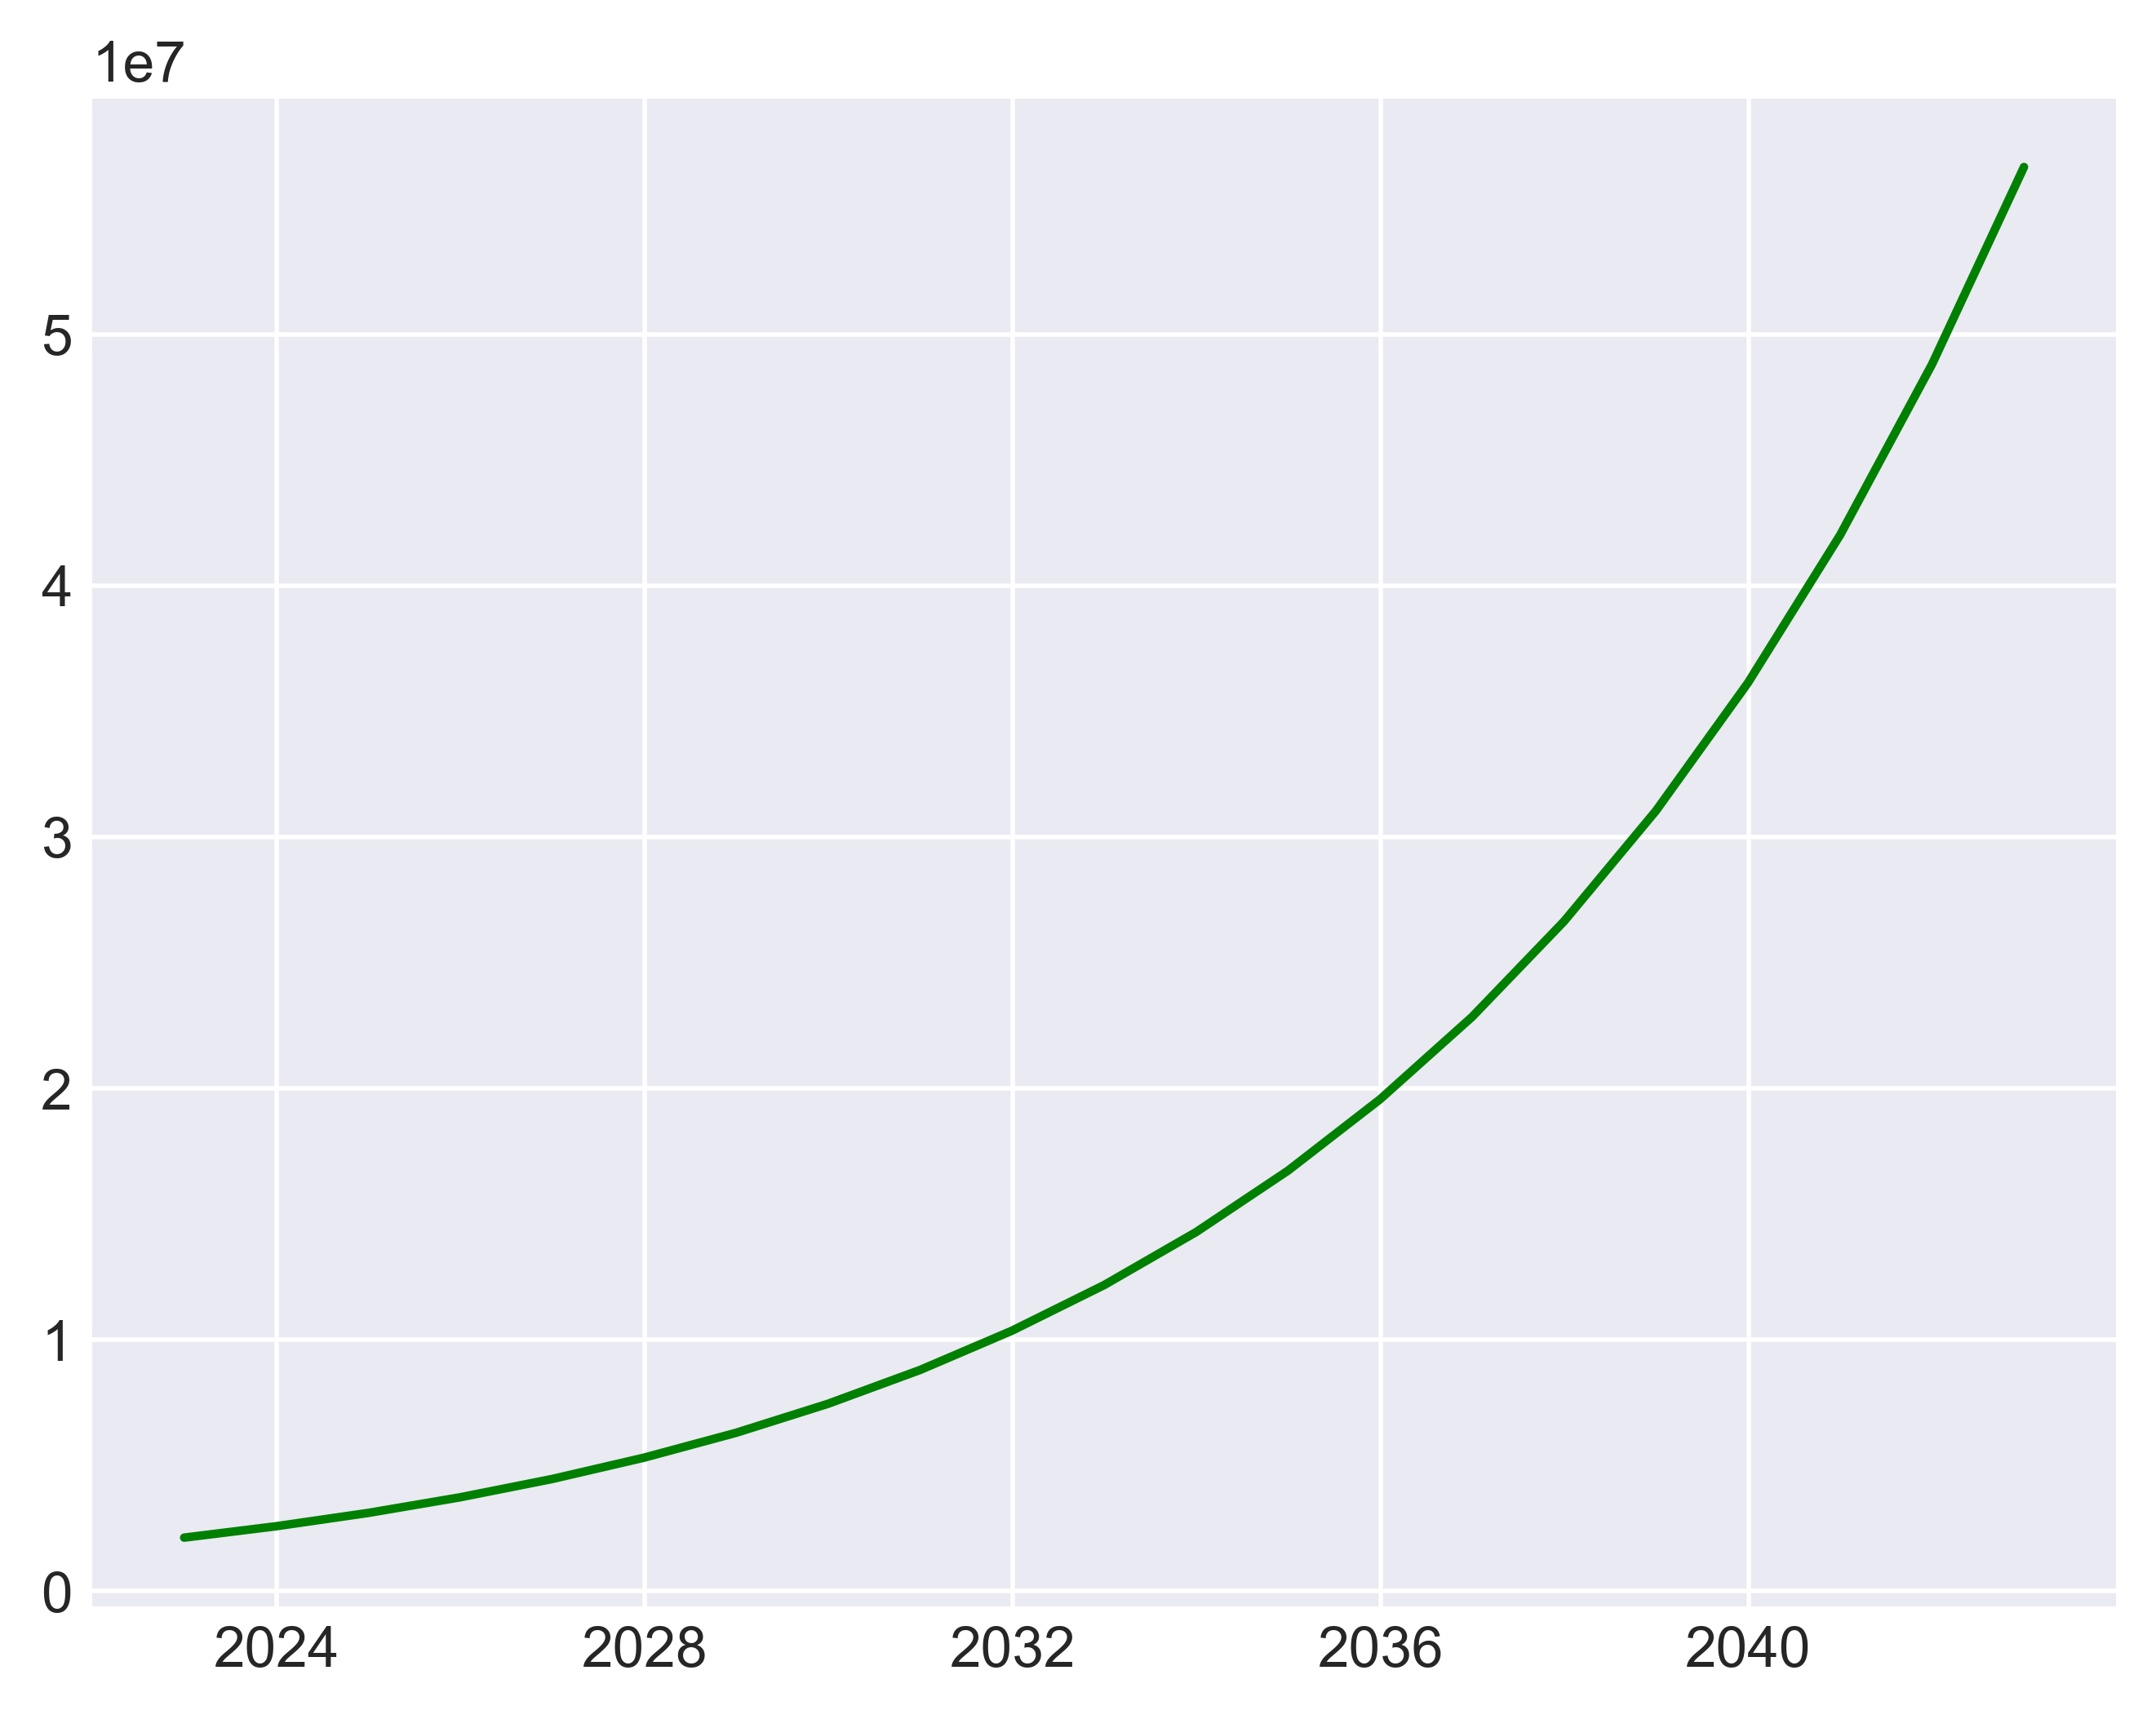

In [471]:
fig, ax1 = plt.subplots()

x = hoard['Date']
y1 = hoard['Wealth']


ax2 = ax1.plot()

ax1.plot(x, y1, 'g-');

## В таком сценарии бывший курильщик получает капитал в почти 56.7 млн руб в номинальном выражении в конце 2042 года

In [472]:
# Сохраняем вычисления в эксельку
hoard.to_excel('по плану.xlsx')
no_hoard.to_excel('после 10 лет не копим.xlsx')